In [2]:
# Salary Trends Based on Geographic Location: "What are the trends in salaries for data science professionals across different regions or cities?"

# Analysis:
# There is a very large disparity between the minimum and maximum salaries measured in USD. The lowest is Ecuador's average salary of $16,000, 
# while the highest average salary belongs to Qatar at $300,000, almost 20 times as large. 
# However, there does not appear to be a significant correlation between the region of the company and the average salary. 

In [3]:
# import
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import requests
import json

In [4]:
# CSV Path
csvpath = Path('salaries.csv')

# Creating DataFrame of csv data
geoLocDF = pd.read_csv(csvpath)

In [5]:
geoLocDF

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Data Scientist,199000,USD,199000,US,0,US,M
1,2023,SE,FT,Data Scientist,196760,USD,196760,US,0,US,M
2,2023,SE,FT,Machine Learning Engineer,90000,USD,90000,CO,0,CO,M
3,2023,SE,FT,Machine Learning Engineer,70000,USD,70000,CO,0,CO,M
4,2023,SE,FT,ML Engineer,324000,USD,324000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8108,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8109,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8110,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8111,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [6]:
geoLocDF['company_location'].value_counts(ascending=True)

company_location
MT       1
BA       1
AM       1
HK       1
ZA       1
      ... 
DE      72
ES     108
CA     181
GB     403
US    6941
Name: count, Length: 73, dtype: int64

In [7]:
# Generating summary statistics table
countryData = geoLocDF.groupby(['company_location'])

countryMean = countryData['salary_in_usd'].mean()
countryMed = countryData['salary_in_usd'].median()
countryVar = countryData['salary_in_usd'].var()
countryStD = countryData['salary_in_usd'].std()
countrySEM = countryData['salary_in_usd'].sem()

countryDF = pd.DataFrame({
    'Salary(USD) Mean': countryMean,
    'Salary(USD) Median': countryMed,
    'Salary(USD) Variance': countryVar,
    'Salary(USD) Std. Dev': countryStD,
    'Salary(USD) Std. Err.': countrySEM
})

countryDF.reset_index(inplace=True)
countryDF

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
0,AD,50745.000000,50745.0,NaN,NaN,NaN
1,AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
2,AM,50000.000000,50000.0,NaN,NaN,NaN
3,AR,62000.000000,60000.0,1.920000e+08,13856.406461,6196.773354
4,AS,34026.500000,34026.5,5.103054e+08,22589.940339,15973.500000
...,...,...,...,...,...,...
68,TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798
69,TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676
70,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493


In [8]:
topCountries = countryDF.sort_values('Salary(USD) Mean', ascending=False)
topCountries.head()

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
61,QA,300000.000000,300000.0,NaN,NaN,NaN
36,IL,217332.000000,119059.0,3.018589e+10,173740.880017,100309.343847
59,PR,167500.000000,167500.0,1.408333e+09,37527.767497,18763.883749
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493
11,CA,142539.519337,135000.0,3.864249e+09,62163.085747,4620.545775


In [9]:
botCountries = countryDF.sort_values('Salary(USD) Mean', ascending=True)
botCountries.head()

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
21,EC,16000.0,16000.0,NaN,NaN,NaN
47,MD,18000.0,18000.0,NaN,NaN,NaN
31,HN,20000.0,20000.0,NaN,NaN,NaN
69,TR,22313.6,20171.0,16285733.3,4035.558611,1804.756676
23,EG,22800.0,22800.0,NaN,NaN,NaN


In [10]:
topten = topCountries.head(10)
botten = botCountries.head(10)
topten

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
61,QA,300000.000000,300000.0,NaN,NaN,NaN
36,IL,217332.000000,119059.0,3.018589e+10,173740.880017,100309.343847
59,PR,167500.000000,167500.0,1.408333e+09,37527.767497,18763.883749
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493
11,CA,142539.519337,135000.0,3.864249e+09,62163.085747,4620.545775
64,SA,134999.000000,134999.0,4.049820e+09,63638.196093,44999.000000
6,AU,133035.043478,83864.0,7.707779e+09,87793.955306,18306.305148
55,NZ,125000.000000,125000.0,NaN,NaN,NaN
70,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
7,BA,120000.000000,120000.0,NaN,NaN,NaN


In [29]:
botten

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.,Regions
21,EC,16000.000000,16000.0,NaN,NaN,NaN,South America
47,MD,18000.000000,18000.0,NaN,NaN,NaN,Europe
31,HN,20000.000000,20000.0,NaN,NaN,NaN,Central America
69,TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676,Europe
23,EG,22800.000000,22800.0,NaN,NaN,NaN,Africa
68,TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798,Asia
33,HU,26709.500000,26709.5,1.629193e+08,12763.984507,9025.500000,Europe
28,GH,27000.000000,30000.0,1.170000e+08,10816.653826,6244.997998,Africa
48,MT,28369.000000,28369.0,NaN,NaN,NaN,Europe
57,PK,30000.000000,30000.0,2.000000e+08,14142.135624,10000.000000,Asia


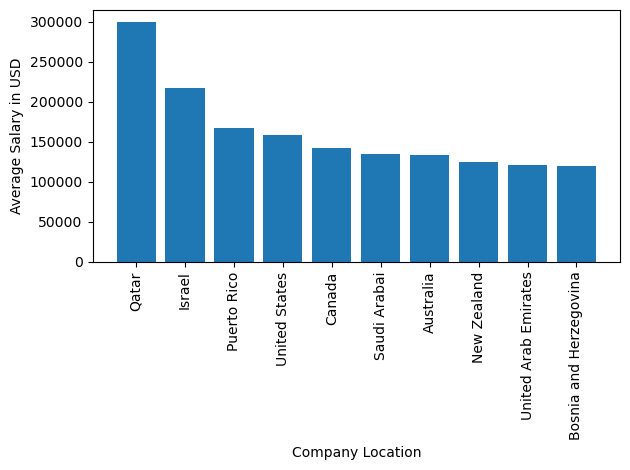

In [28]:
barChart1 = topten
plt.bar(topten['company_location'], topten['Salary(USD) Mean'], align='center')
plt.xticks(ticks=topten['company_location'], labels=['Qatar', 'Israel', 'Puerto Rico', 'United States', 'Canada', 'Saudi Arabai', 'Australia', 'New Zealand', 'United Arab Emirates', 'Bosnia and Herzegovina'], rotation = 90)
plt.ylabel('Average Salary in USD')
plt.xlabel('Company Location')
plt.tight_layout()
plt.show()



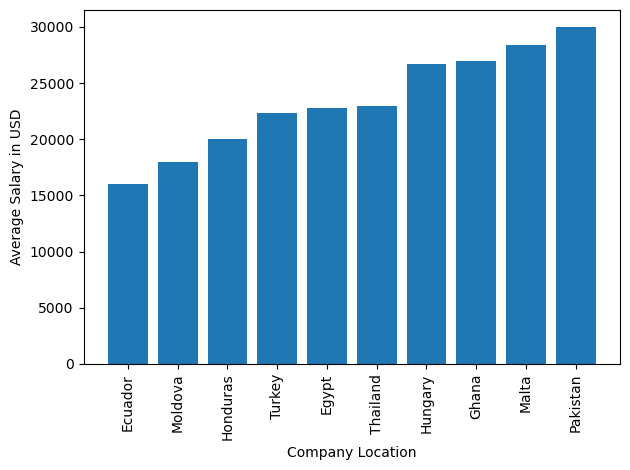

In [26]:
barChart2 = botten
plt.bar(botten['company_location'], botten['Salary(USD) Mean'])
plt.xticks(botten['company_location'], labels=['Ecuador', 'Moldova', 'Honduras', 'Turkey', 'Egypt', 'Thailand', 'Hungary', 'Ghana', 'Malta', 'Pakistan'], rotation = 90)
plt.ylabel('Average Salary in USD')
plt.xlabel('Company Location')
plt.tight_layout()
plt.show()


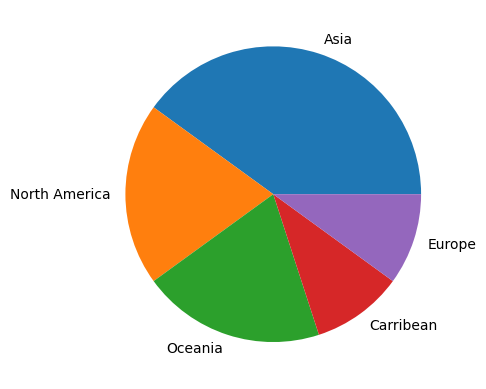

In [15]:
labels1 = ['Asia', 'North America', 'Oceania', 'Carribean', 'Europe']
sizes1 = [40,20,20,10,10]
fig, ax = plt.subplots()
ax.pie(sizes1, labels = labels1)
plt.show()

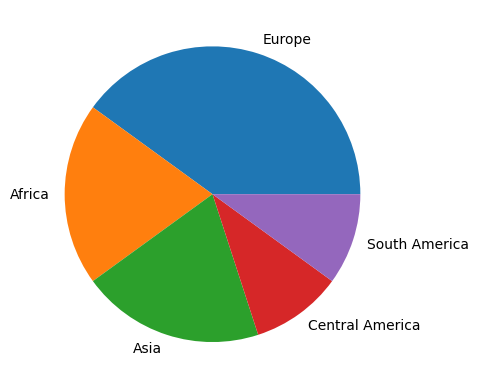

In [16]:
labels2 = ['Europe', 'Africa', 'Asia', 'Central America', 'South America']
sizes2 = [40,20,20,10,10]
fix, ax = plt.subplots()
ax.pie(sizes2, labels= labels2)
plt.show()

In [30]:
tophalf = topCountries.head(36)
bothalf = botCountries.head(37)

In [33]:
workerData = geoLocDF.groupby(['employee_residence'])

workerMean = workerData['salary_in_usd'].mean()
workerMed = workerData['salary_in_usd'].median()
workerVar = workerData['salary_in_usd'].var()
workerStD = workerData['salary_in_usd'].std()
workerSEM = workerData['salary_in_usd'].sem()

workerDF = pd.DataFrame({
    'Salary(USD) Mean': workerMean,
    'Salary(USD) Median': workerMed,
    'Salary(USD) Variance': workerVar,
    'Salary(USD) Std. Dev': workerStD,
    'Salary(USD) Std. Err.': workerSEM
})

workerDF.reset_index(inplace=True)
workerDF

,employee_residence,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
0,AD,50745.000000,50745.0,NaN,NaN,NaN
1,AE,100000.000000,115000.0,9.250000e+08,30413.812651,17559.422921
2,AM,33500.000000,33500.0,5.445000e+08,23334.523779,16500.000000
3,AR,56444.444444,60000.0,2.147778e+08,14655.298625,4885.099542
4,AS,45555.000000,45555.0,NaN,NaN,NaN
...,...,...,...,...,...,...
80,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
81,US,159176.023067,150000.0,3.478823e+09,58981.550330,710.414872
82,UZ,82000.000000,100000.0,1.332000e+09,36496.575182,21071.307506
83,VN,44200.000000,44200.0,6.728000e+07,8202.438662,5800.000000


In [37]:
topResidence = workerDF.sort_values('Salary(USD) Mean', ascending=False)
botResidence = workerDF.sort_values('Salary(USD) Mean',ascending=True)

In [38]:
topResidence

,employee_residence,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
41,IL,417937.000000,417937.0,NaN,NaN,NaN
69,QA,300000.000000,300000.0,NaN,NaN,NaN
58,MY,200000.000000,200000.0,NaN,NaN,NaN
67,PR,166000.000000,160000.0,1.067500e+09,32672.618505,14611.639196
81,US,159176.023067,150000.0,3.478823e+09,58981.550330,710.414872
...,...,...,...,...,...,...
71,RS,25532.000000,25532.0,NaN,NaN,NaN
36,HN,20000.000000,20000.0,NaN,NaN,NaN
18,CR,20000.000000,20000.0,NaN,NaN,NaN
25,EC,16000.000000,16000.0,NaN,NaN,NaN


In [39]:
botResidence

,employee_residence,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
39,ID,15000.000000,15000.0,NaN,NaN,NaN
25,EC,16000.000000,16000.0,NaN,NaN,NaN
36,HN,20000.000000,20000.0,NaN,NaN,NaN
18,CR,20000.000000,20000.0,NaN,NaN,NaN
71,RS,25532.000000,25532.0,NaN,NaN,NaN
...,...,...,...,...,...,...
81,US,159176.023067,150000.0,3.478823e+09,58981.550330,710.414872
67,PR,166000.000000,160000.0,1.067500e+09,32672.618505,14611.639196
58,MY,200000.000000,200000.0,NaN,NaN,NaN
69,QA,300000.000000,300000.0,NaN,NaN,NaN


In [31]:
tophalf

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
61,QA,300000.000000,300000.0,NaN,NaN,NaN
36,IL,217332.000000,119059.0,3.018589e+10,173740.880017,100309.343847
59,PR,167500.000000,167500.0,1.408333e+09,37527.767497,18763.883749
71,US,158637.921913,150000.0,3.518624e+09,59317.991407,711.992493
11,CA,142539.519337,135000.0,3.864249e+09,62163.085747,4620.545775
64,SA,134999.000000,134999.0,4.049820e+09,63638.196093,44999.000000
6,AU,133035.043478,83864.0,7.707779e+09,87793.955306,18306.305148
55,NZ,125000.000000,125000.0,NaN,NaN,NaN
70,UA,121333.333333,84000.0,7.586667e+09,87101.473390,35559.027608
7,BA,120000.000000,120000.0,NaN,NaN,NaN


In [32]:
bothalf

,company_location,Salary(USD) Mean,Salary(USD) Median,Salary(USD) Variance,Salary(USD) Std. Dev,Salary(USD) Std. Err.
21,EC,16000.000000,16000.0,NaN,NaN,NaN
47,MD,18000.000000,18000.0,NaN,NaN,NaN
31,HN,20000.000000,20000.0,NaN,NaN,NaN
69,TR,22313.600000,20171.0,1.628573e+07,4035.558611,1804.756676
23,EG,22800.000000,22800.0,NaN,NaN,NaN
68,TH,22971.333333,24613.0,5.315095e+07,7290.469967,4209.154798
33,HU,26709.500000,26709.5,1.629193e+08,12763.984507,9025.500000
28,GH,27000.000000,30000.0,1.170000e+08,10816.653826,6244.997998
48,MT,28369.000000,28369.0,NaN,NaN,NaN
57,PK,30000.000000,30000.0,2.000000e+08,14142.135624,10000.000000
